In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression

In [4]:
all_features_table = pd.read_csv('../dataset/final/final/new_features/human_features_sparse_wwe.csv')
# data = data.drop(['Unnamed: 0'],axis = 1)
display(all_features_table.head())
potentials_table = pd.read_csv('../dataset/final/final/New_potential.csv')
data_table = pd.merge(all_features_table,potentials_table,on = 'product_id')
display(data_table.head())
display(data_table.shape)
data_table.rename(columns = {'potential_025':'potential'},inplace = True)
potentials = data_table['potential'].values
print(potentials)
if potentials.all()>0:
    print('T')

,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Fluorofibre,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose
0,2134,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2135,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2136,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2137,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2138,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential_025
0,2134,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.526208
1,2135,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.999364
2,2136,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.946084
3,2137,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.605577
4,2138,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.923380


(1836, 105)

[ 7.52620809 14.9993644  11.94608444 ...  5.52037782 18.40806916
  4.7040073 ]
T


In [6]:
product_list = list(data_table.product_id)
display(len(product_list))
colours_feature = pd.read_csv('../dataset/final/final/new_features/colors_name-2.csv', index_col = 0)
composition_feature = pd.read_csv('../dataset/final/final/new_features/composition.csv')

colours_feature = colours_feature[colours_feature.product_id.isin(product_list)]
composition_feature = composition_feature[composition_feature.product_id.isin(product_list)]

raw_features = pd.read_csv('for_EDA.csv')
raw_features = raw_features[raw_features.product_id.isin(product_list)]

all_raw_features = pd.merge(raw_features, colours_feature, on = 'product_id')
all_raw_features = pd.merge(all_raw_features, composition_feature, on = 'product_id', how = 'left')
all_raw_features = all_raw_features.merge(data_table[['product_id','potential']], on = 'product_id')
display(all_raw_features.shape)
features_list = list(all_raw_features)
features_list.remove('category type')
all_raw_features = all_raw_features[features_list]

all_raw_features.rename(columns = {'potential':'potential'},inplace = True)

display(all_raw_features.head())
display(all_raw_features.shape)

1836

(1836, 14)

,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential
0,2134,T-shirt à message,T-Shirt standard 45-65cm-Manches courtes-Col r...,summer,4.0,fabric embellishment,NaN,positional print,covered shoulders,regular,grey,100% Coton,7.526208
1,2135,T-shirt brodé,T-Shirt standard 45-65cm-Manches courtes-Col r...,summer,4.0,fabric embellishment,floral,NaN,covered shoulders,NaN,black,100% Coton,14.999364
2,2136,T-shirt brodé,T-Shirt standard 45-65cm-Manches courtes-Col r...,summer,4.0,fabric embellishment,NaN,NaN,covered shoulders,regular,white,100% Coton,11.946084
3,2137,T-shirt imprimé,T-Shirt standard 45-65cm-Manches courtes-Col r...,summer,4.0,NaN,NaN,NaN,NaN,NaN,black,100% Coton,8.605577
4,2138,T-shirt imprimé,T-Shirt standard 45-65cm-Manches courtes-Col r...,summer,4.0,fabric embellishment,floral,full print,covered shoulders,regular,black,100% Coton,6.923380


(1836, 13)

## -Deal with style

In [7]:
all_raw_features['style'] = all_raw_features['style'].fillna('0-0-0')
all_raw_features['style'] = all_raw_features['style'].str.lower()
all_raw_features['style'] = all_raw_features['style'].str.replace('45-65cm','45/65cm')
all_raw_features['style'] = all_raw_features['style'].str.replace('cache-coeur','cache_coeur')
all_raw_features['style'] = all_raw_features['style'].str.replace('t-shirt','tshirt')
all_raw_features['style'] = all_raw_features['style'].str.replace(' ','_')
all_raw_features['style'] = all_raw_features['style'].apply(lambda x: ' '.join(c for c in x.split('-')))
display(all_raw_features.head())

,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential
0,2134,T-shirt à message,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,positional print,covered shoulders,regular,grey,100% Coton,7.526208
1,2135,T-shirt brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,NaN,covered shoulders,NaN,black,100% Coton,14.999364
2,2136,T-shirt brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,NaN,covered shoulders,regular,white,100% Coton,11.946084
3,2137,T-shirt imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,NaN,NaN,NaN,NaN,NaN,black,100% Coton,8.605577
4,2138,T-shirt imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,full print,covered shoulders,regular,black,100% Coton,6.923380


In [8]:
display(all_raw_features.loc[0,'style'].split())
style_list = []
for i in range(len(all_raw_features)):
    style_list.append(all_raw_features.loc[i,'style'].split()[0])
    style_list.append(all_raw_features.loc[i,'style'].split()[1])
    style_list.append(all_raw_features.loc[i,'style'].split()[2])
style_array = np.array(style_list).reshape(len(all_raw_features),3)
display(style_array)
all_raw_features['style_shape'] = style_array[:,0]
all_raw_features['style_sleeve'] = style_array[:,1]
all_raw_features['style_collar'] = style_array[:,2]

all_raw_features['style_shape'] = all_raw_features['style_shape'].str.replace('45/65cm','45-65cm')

all_raw_features['style_collar'] = all_raw_features['style_collar'].str.replace('col_batea','col_bateau')
all_raw_features['style_collar'] = all_raw_features['style_collar'].str.replace('col_bateauu','col_bateau')
display(all_raw_features.head())

['tshirt_standard_45/65cm', 'manches_courtes', 'col_rond']

array([['tshirt_standard_45/65cm', 'manches_courtes', 'col_rond'],
       ['tshirt_standard_45/65cm', 'manches_courtes', 'col_rond'],
       ['tshirt_standard_45/65cm', 'manches_courtes', 'col_rond'],
       ...,
       ['tshirt_standard_45/65cm', 'manches_longues', 'col_v'],
       ['tshirt_standard_45/65cm', 'sans_manches', 'col_rond'],
       ['tshirt_standard_45/65cm', 'sans_manches', 'col_rond']],
      dtype='<U23')

,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential,style_shape,style_sleeve,style_collar
0,2134,T-shirt à message,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,positional print,covered shoulders,regular,grey,100% Coton,7.526208,tshirt_standard_45-65cm,manches_courtes,col_rond
1,2135,T-shirt brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,NaN,covered shoulders,NaN,black,100% Coton,14.999364,tshirt_standard_45-65cm,manches_courtes,col_rond
2,2136,T-shirt brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,NaN,covered shoulders,regular,white,100% Coton,11.946084,tshirt_standard_45-65cm,manches_courtes,col_rond
3,2137,T-shirt imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,NaN,NaN,NaN,NaN,NaN,black,100% Coton,8.605577,tshirt_standard_45-65cm,manches_courtes,col_rond
4,2138,T-shirt imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,full print,covered shoulders,regular,black,100% Coton,6.923380,tshirt_standard_45-65cm,manches_courtes,col_rond


## -Deal with name

In [9]:
name_feature_list = ['basique','brodé','cropped','côtelé','dentelle','débardeur',
                     'fines','imprimé','maille','message']
print(name_feature_list)

['basique', 'brodé', 'cropped', 'côtelé', 'dentelle', 'débardeur', 'fines', 'imprimé', 'maille', 'message']


In [10]:
all_raw_features['name'] = all_raw_features['name'].str.lower()
all_raw_features['name'] = all_raw_features['name'].fillna('0')
display(all_raw_features.head())
all_raw_features['name'] = all_raw_features['name'].str.split()

,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential,style_shape,style_sleeve,style_collar
0,2134,t-shirt à message,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,positional print,covered shoulders,regular,grey,100% Coton,7.526208,tshirt_standard_45-65cm,manches_courtes,col_rond
1,2135,t-shirt brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,NaN,covered shoulders,NaN,black,100% Coton,14.999364,tshirt_standard_45-65cm,manches_courtes,col_rond
2,2136,t-shirt brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,NaN,covered shoulders,regular,white,100% Coton,11.946084,tshirt_standard_45-65cm,manches_courtes,col_rond
3,2137,t-shirt imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,NaN,NaN,NaN,NaN,NaN,black,100% Coton,8.605577,tshirt_standard_45-65cm,manches_courtes,col_rond
4,2138,t-shirt imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,full print,covered shoulders,regular,black,100% Coton,6.923380,tshirt_standard_45-65cm,manches_courtes,col_rond


In [11]:
for i in range(len(all_raw_features)):
    word_str = ''
    for word in all_raw_features.loc[i,'name']:
        if word in name_feature_list:
            word_str += word
            word_str += ' '
    if len(word_str)>0 and word_str[-1] == ' ':
        word_str = word_str[:-1]
    else:
        word_str = 'NaN'
    all_raw_features.loc[i,'name'] = word_str

In [12]:
all_raw_features[all_raw_features['product_id']==2170]['name']

28    débardeur
Name: name, dtype: object

In [13]:
## some products' names have two words!!!!!
all_raw_features['name'] = all_raw_features['name'].str.replace('fines dentelle','dentelle')
all_raw_features['name'] = all_raw_features['name'].str.replace('cropped côtelé','côtelé')
all_raw_features['name'] = all_raw_features['name'].str.replace('basique fines','basique')
all_raw_features['name'] = all_raw_features['name'].str.replace('débardeur dentelle','débardeur')
all_raw_features['name'] = all_raw_features['name'].str.replace('débardeur brodé','débardeur')
all_raw_features['name'] = all_raw_features['name'].str.replace('débardeur côtelé','débardeur')
all_raw_features['name'] = all_raw_features['name'].str.replace('débardeur maille','débardeur')
all_raw_features['name'] = all_raw_features['name'].str.replace('débardeur basique','basique')
# débardeur dentelle       9
# débardeur brodé          7
# débardeur côtelé         3
# débardeur maille         1
# débardeur basique       66
display(all_raw_features.head())
print(all_raw_features.name.unique())



,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential,style_shape,style_sleeve,style_collar
0,2134,message,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,positional print,covered shoulders,regular,grey,100% Coton,7.526208,tshirt_standard_45-65cm,manches_courtes,col_rond
1,2135,brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,NaN,covered shoulders,NaN,black,100% Coton,14.999364,tshirt_standard_45-65cm,manches_courtes,col_rond
2,2136,brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,NaN,covered shoulders,regular,white,100% Coton,11.946084,tshirt_standard_45-65cm,manches_courtes,col_rond
3,2137,imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,NaN,NaN,NaN,NaN,NaN,black,100% Coton,8.605577,tshirt_standard_45-65cm,manches_courtes,col_rond
4,2138,imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,full print,covered shoulders,regular,black,100% Coton,6.923380,tshirt_standard_45-65cm,manches_courtes,col_rond


['message' 'brodé' 'imprimé' 'NaN' 'fines' 'débardeur' 'cropped'
 'dentelle' 'basique' 'maille' 'côtelé']


In [14]:
all_raw_features = all_raw_features.fillna('NaN')
display(all_raw_features.head())
display(all_raw_features.shape)

,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential,style_shape,style_sleeve,style_collar
0,2134,message,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,positional print,covered shoulders,regular,grey,100% Coton,7.526208,tshirt_standard_45-65cm,manches_courtes,col_rond
1,2135,brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,NaN,covered shoulders,NaN,black,100% Coton,14.999364,tshirt_standard_45-65cm,manches_courtes,col_rond
2,2136,brodé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,NaN,NaN,covered shoulders,regular,white,100% Coton,11.946084,tshirt_standard_45-65cm,manches_courtes,col_rond
3,2137,imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,NaN,NaN,NaN,NaN,NaN,black,100% Coton,8.605577,tshirt_standard_45-65cm,manches_courtes,col_rond
4,2138,imprimé,tshirt_standard_45/65cm manches_courtes col_rond,summer,4.0,fabric embellishment,floral,full print,covered shoulders,regular,black,100% Coton,6.923380,tshirt_standard_45-65cm,manches_courtes,col_rond


(1836, 16)

In [22]:
raw_features_classification = all_raw_features[['product_id','name','price','color',
                                                'style_shape','style_sleeve','style_collar']]
raw_features_classification.to_csv('classification_EDA.csv',index = False)

# Histogram of Potentials

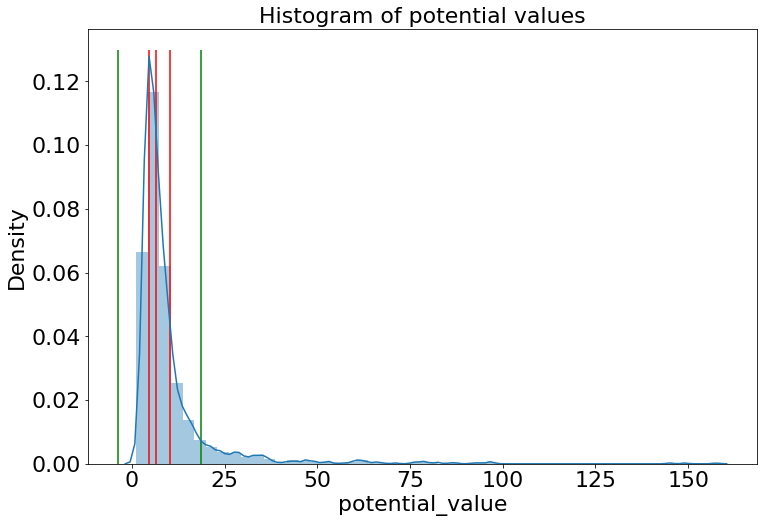

In [29]:
##pdf of potential
plt.figure(figsize=(12,8))
sns.distplot(potentials,kde = True).set_title('Histogram of potential values',fontsize = 22)

Q1 = data_table['potential'].quantile(0.25)
Q2 = data_table['potential'].quantile(0.5)
Q3 = data_table['potential'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 *IQR
upper = Q3 + 1.5 *IQR

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.vlines(Q1,0,0.13,color="red")
plt.vlines(Q2,0,0.13,color="red")
plt.vlines(Q3,0,0.13,color="red")
plt.vlines(lower,0,0.13,color="green")
plt.vlines(upper,0,0.13,color="green")
plt.xlabel('potential_value',fontsize = 22)
plt.ylabel('Density',fontsize = 22)
plt.savefig("../../saved_figs/shape of potentials.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

In [47]:
q78 = data_table['potential_025'].quantile(7/8)
q58 = data_table['potential_025'].quantile(5/8)
q38 = data_table['potential_025'].quantile(3/8)
q18 = data_table['potential_025'].quantile(1/8)
print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('potential mean: ', potentials.mean())
print('potential std: ', potentials.std())
print('min',potentials.min())
print('max',potentials.max())
0print('IQR', Q3-Q1)
print('MAD', data_table['potential_025'].mad())
print('Var', data_table['potential_025'].var())
print('Skewness', data_table['potential_025'].skew())
print('Galton measure of Skewness', (Q3+Q1-2*Q2)/(Q3-Q1))
# print('Kurtosis', stats.kurtosis(potentials))
print('Kurtosis', 
      stats.kurtosis(potentials))
print('Robust kurtosis', (q78+q18-q58-q38)/(Q3-Q1))

Q1:  4.628109602476876
Q2:  6.612502345011514
Q3:  10.189826941982368
potential mean:  10.109608287163857
potential std:  12.479271321469186
min 1.1840478871107225
max 157.4969031034677
IQR 5.561717339505492
MAD 6.495824089013229
Var 155.8170804056963
Skewness 5.253672861151813
Galton measure of Skewness 0.2864100703431017
Kurtosis 38.80901208506023
Robust kurtosis 1.07450898441409


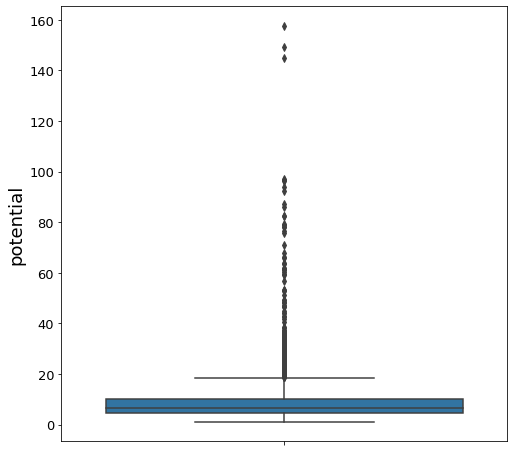

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(y = 'potential', data = all_raw_features)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('potential',fontsize = 18)
plt.savefig('../../saved_figs/potential_boxplot.pdf', dpi = 1200,bbox_inches = 'tight')

# price

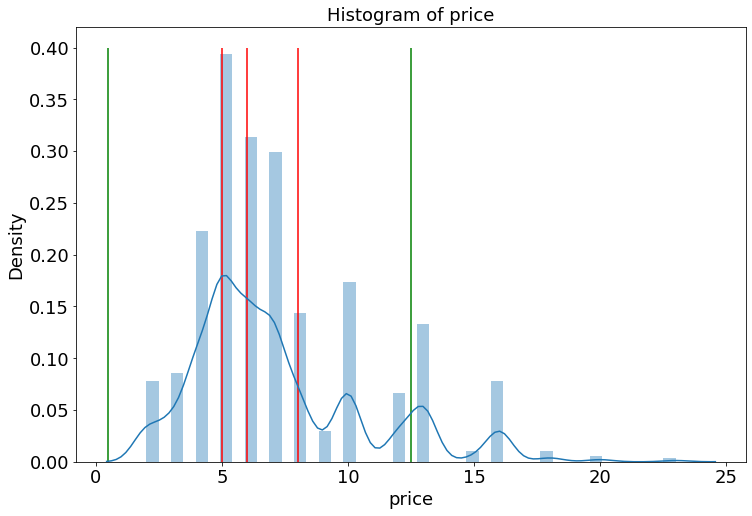

In [40]:
plt.figure(figsize=(12,8))
price = data_table['price'].values
sns.distplot(price,kde = True).set_title('Histogram of price',fontsize = 18)

Q1 = data_table['price'].quantile(0.25)
Q2 = data_table['price'].quantile(0.5)
Q3 = data_table['price'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 *IQR
upper = Q3 + 1.5 *IQR
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.vlines(Q1,0,0.4,color="red")
plt.vlines(Q2,0,0.4,color="red")
plt.vlines(Q3,0,0.4,color="red")
plt.vlines(lower,0,0.4,color="green")
plt.vlines(upper,0,0.4,color="green")
plt.xlabel('price',fontsize = 18)
plt.ylabel('Density',fontsize = 18)
plt.savefig("../../saved_figs/shape of price.pdf",dpi=600,bbox_inches = 'tight')
plt.show()

In [49]:
q78 = data_table['price'].quantile(7/8)
q58 = data_table['price'].quantile(5/8)
q38 = data_table['price'].quantile(3/8)
q18 = data_table['price'].quantile(1/8)
print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('potential mean: ', price.mean())
print('potential std: ', price.std())
print('min',price.min())
print('max',price.max())
print('IQR', Q3-Q1)
print('MAD', data_table['price'].mad())
print('Var', data_table['price'].var())
print('Skewness', data_table['price'].skew())
print('Galton measure of Skewness', (Q3+Q1-2*Q2)/(Q3-Q1))
# print('Kurtosis', stats.kurtosis(potentials))
print('Kurtosis', 
      stats.kurtosis(price))
print('Robust kurtosis', (q78+q18-q58-q38)/(Q3-Q1))

Q1:  5.0
Q2:  6.0
Q3:  8.0
potential mean:  7.181917211328976
potential std:  3.522974676699612
min 2.0
max 23.0
IQR 3.0
MAD 2.6930442232569396
Var 12.418114251453025
Skewness 1.1721349598542767
Galton measure of Skewness 0.3333333333333333
Kurtosis 1.1895323333326715
Robust kurtosis 1.3333333333333333


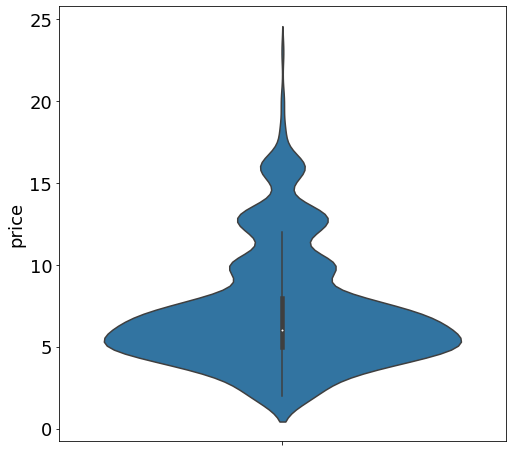

In [42]:
plt.figure(figsize=(8,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('price',fontsize = 18)
sns.violinplot(y ='price', data = all_raw_features,fontsize = 18)
plt.savefig('../../saved_figs/price_violin.pdf', dpi = 1200,bbox_inches = 'tight')

# Correlation

##  - price

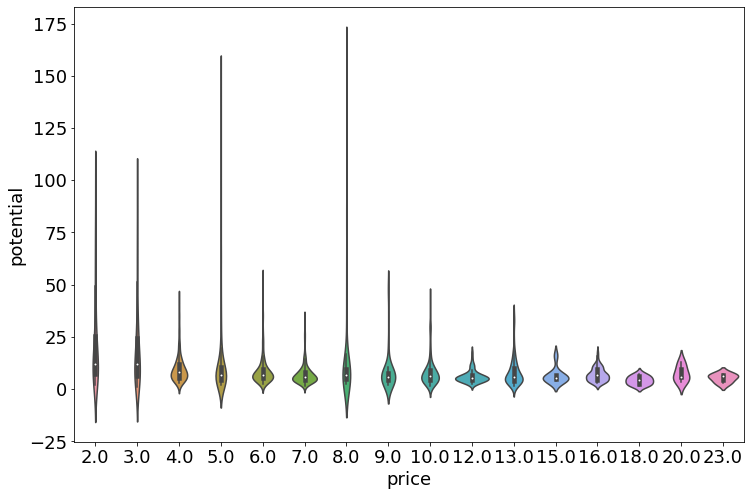

In [45]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('price',fontsize = 18)
plt.ylabel('potential',fontsize = 18)

sns.violinplot(x = all_raw_features['price'],y = all_raw_features['potential'], fontsize = 18)
plt.savefig('../../saved_figs/price_violin_corr.pdf', dpi = 1200,bbox_inches = 'tight')

## -season

winter    918
summer    918
Name: season, dtype: int64


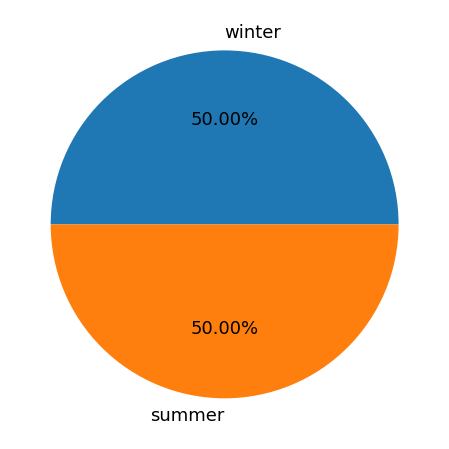

In [47]:
plt.figure(figsize=(8,8))
# plt.title("Distribution of season",fontsize = 11)
sorted_counts = all_raw_features['season'].value_counts()
print(sorted_counts)

patches,l_text,p_text = plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)
plt.savefig("../../saved_figs/Pie chart of season.pdf",dpi=800,bbox_inches = 'tight')
plt.show()

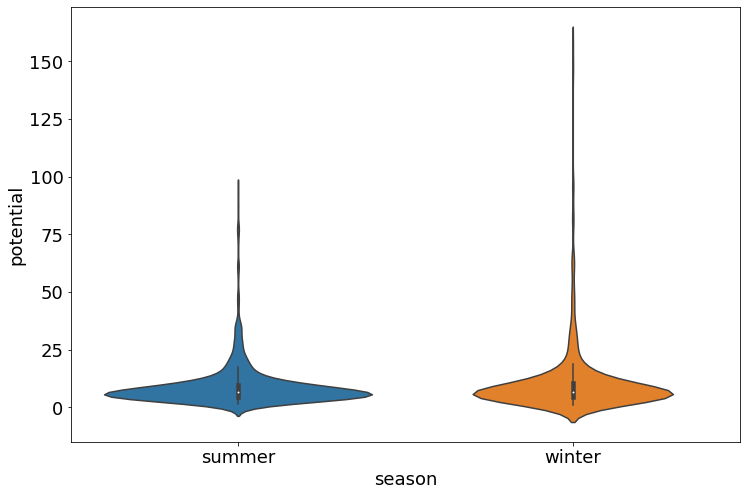

In [50]:
plt.figure(figsize=(12,8))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlabel('season',fontsize = 18)
plt.ylabel('potential',fontsize = 18)


sns.violinplot(x = all_raw_features['season'],y = all_raw_features['potential'], fontsize = 18)
plt.savefig('../../saved_figs/season_violin.pdf', dpi = 1200,bbox_inches = 'tight')

## -name

NaN          1164
dentelle      165
imprimé        94
basique        89
brodé          68
côtelé         49
maille         46
débardeur      43
message        42
cropped        41
fines          35
Name: name, dtype: int64


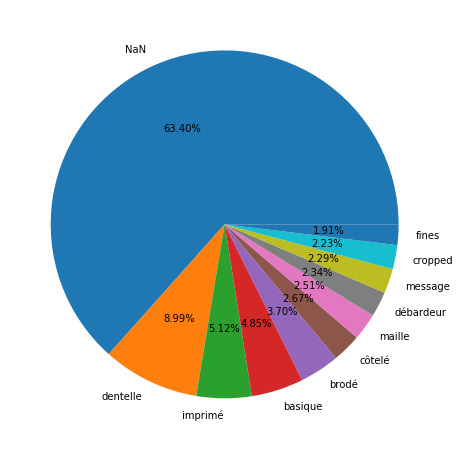

In [49]:
plt.figure(figsize=(8,8))
# plt.title("Distribution of season",fontsize = 11)
sorted_counts = all_raw_features['name'].value_counts()
print(sorted_counts)
plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
plt.savefig("../../saved_figs/Pie chart of name.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

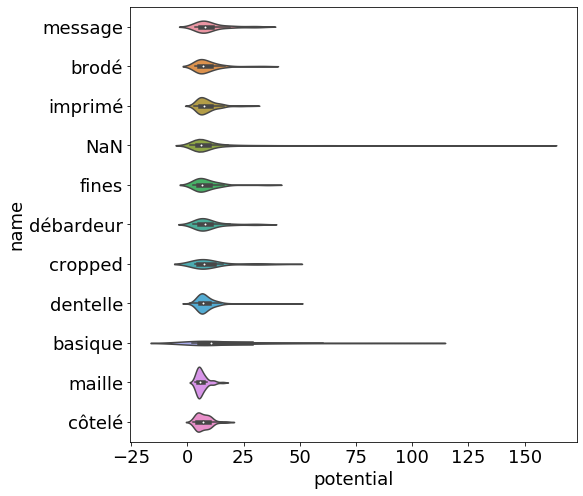

In [56]:
plt.figure(figsize=(8,8))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlabel('potential',fontsize = 18)
plt.ylabel('name',fontsize = 18)


sns.violinplot(y = all_raw_features['name'],x = all_raw_features['potential'], fontsize = 18,orient = 'h')
plt.savefig('../../saved_figs/name_violin.pdf', dpi = 1200,bbox_inches = 'tight')

## -colour

In [201]:
display(len(sorted_counts))

12

black     427
white     404
NaN       165
green     136
red       132
blue      119
yellow    107
pink       98
grey       83
brown      55
beige      48
purple     31
orange     31
Name: color, dtype: int64


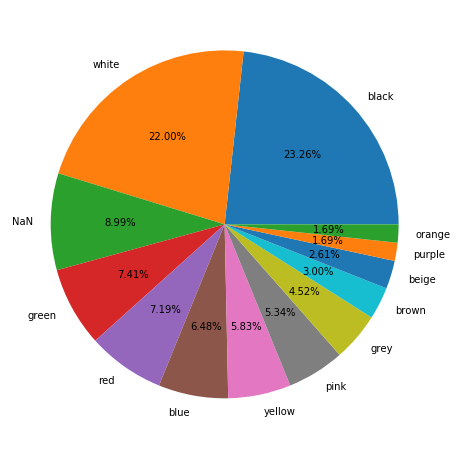

In [57]:
plt.figure(figsize=(8,8))
# plt.title("Distribution of colour",fontsize = 11)
sorted_counts = all_raw_features['color'].value_counts()
print(sorted_counts)
plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
plt.savefig("../../saved_figs/Pie chart of colour.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

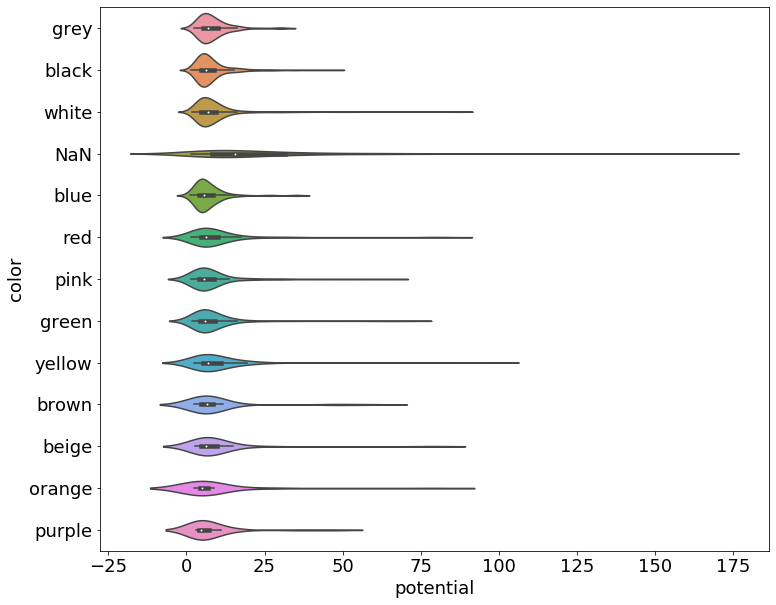

In [64]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('colour',fontsize = 18)
plt.xlabel('potential',fontsize = 18)

sns.violinplot(y = all_raw_features['color'],x = all_raw_features['potential'], fontsize = 18, orient = 'h')
plt.savefig('../../saved_figs/color_violin.pdf', dpi = 1200,bbox_inches = 'tight')

## -embellishments

fabric embellishment      70
zippers                    4
simple                   195
sequins                   34
pockets                    3
NaN                     1499
fur                        1
buttons                   19
fringe                     8
tie closure                3
Name: embellishments, dtype: int64


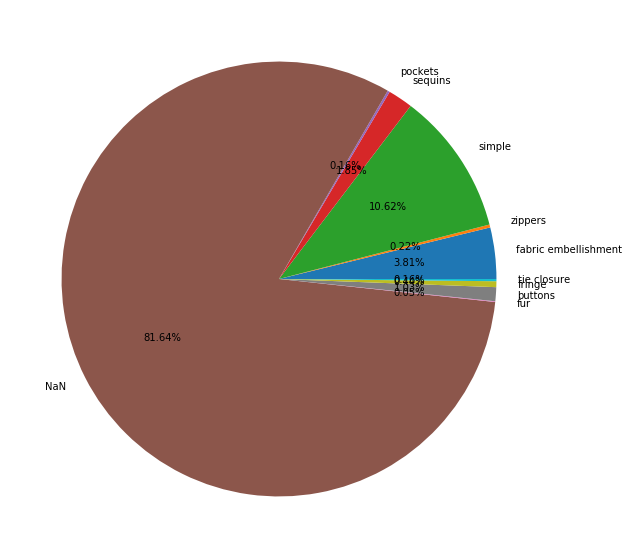

In [72]:
plt.figure(figsize=(10,10))
# plt.title("Distribution of colour",fontsize = 11)
sorted_counts = all_raw_features['embellishments'].value_counts()
sorted_counts = sorted_counts.sample(frac = 1,random_state = 15)
print(sorted_counts)
plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
plt.savefig("../../saved_figs/Pie chart of embellishments.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

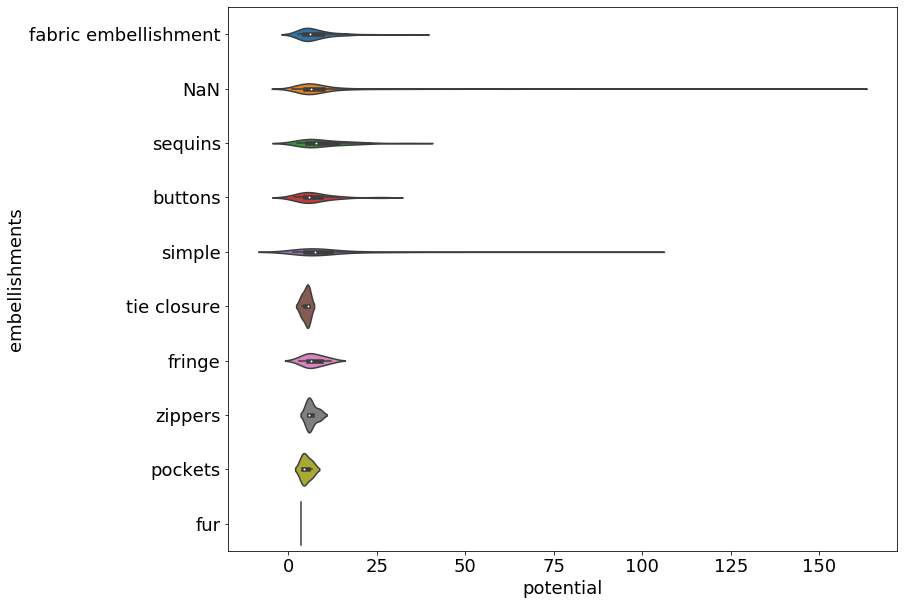

In [66]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('embellishments',fontsize = 18)
plt.xlabel('potential',fontsize = 18)

sns.violinplot(y = all_raw_features['embellishments'],x = all_raw_features['potential'],orient = 'h')
plt.savefig("../../saved_figs/violin plot of embellishments.pdf",dpi=1200,bbox_inches = 'tight')

## -tops silhouette

NaN              1566
regular           169
crop top           94
loose/relaxed       6
tight               1
Name: tops silhouette, dtype: int64


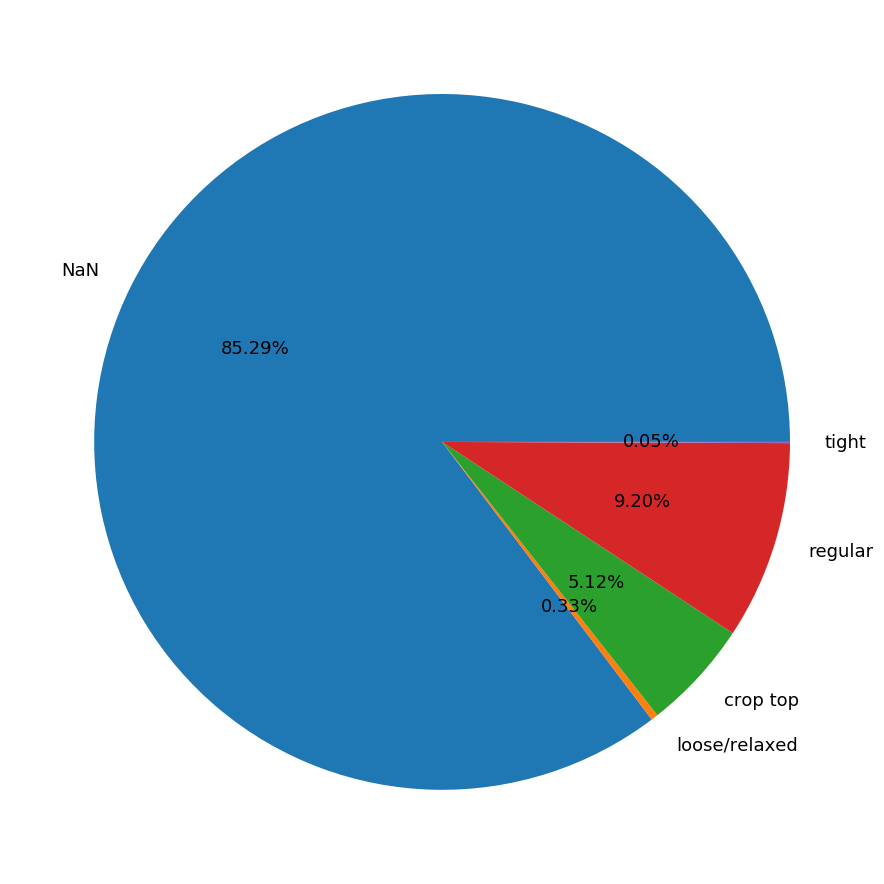

In [75]:
plt.figure(figsize=(16,16))
sorted_counts = all_raw_features['tops silhouette'].value_counts()
print(sorted_counts)
sorted_counts = sorted_counts.sample(frac = 1,random_state = 7)
patches,l_text,p_text = plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)

plt.savefig("../../saved_figs/Pie chart of top silhouette.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

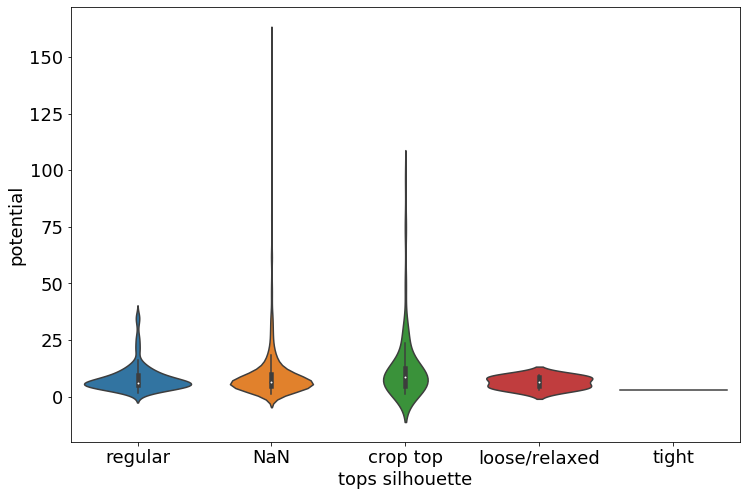

In [76]:
plt.figure(figsize=(12,8))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlabel('price',fontsize = 18)
plt.ylabel('potential',fontsize = 18)

sns.violinplot(x = all_raw_features['tops silhouette'],y = all_raw_features['potential'])
plt.savefig("../../saved_figs/violin plot of top silhouette.pdf",dpi=1200,bbox_inches = 'tight')

## -Style(shape)

tshirt_standard_45-65cm    1645
tshirt_court_(<45cm)         93
body                         58
tshirt_long_(>65cm)          22
tshirt_bandeau                9
dos_nu                        5
tshirt_asymétrique            3
cache_coeur                   1
Name: style_shape, dtype: int64


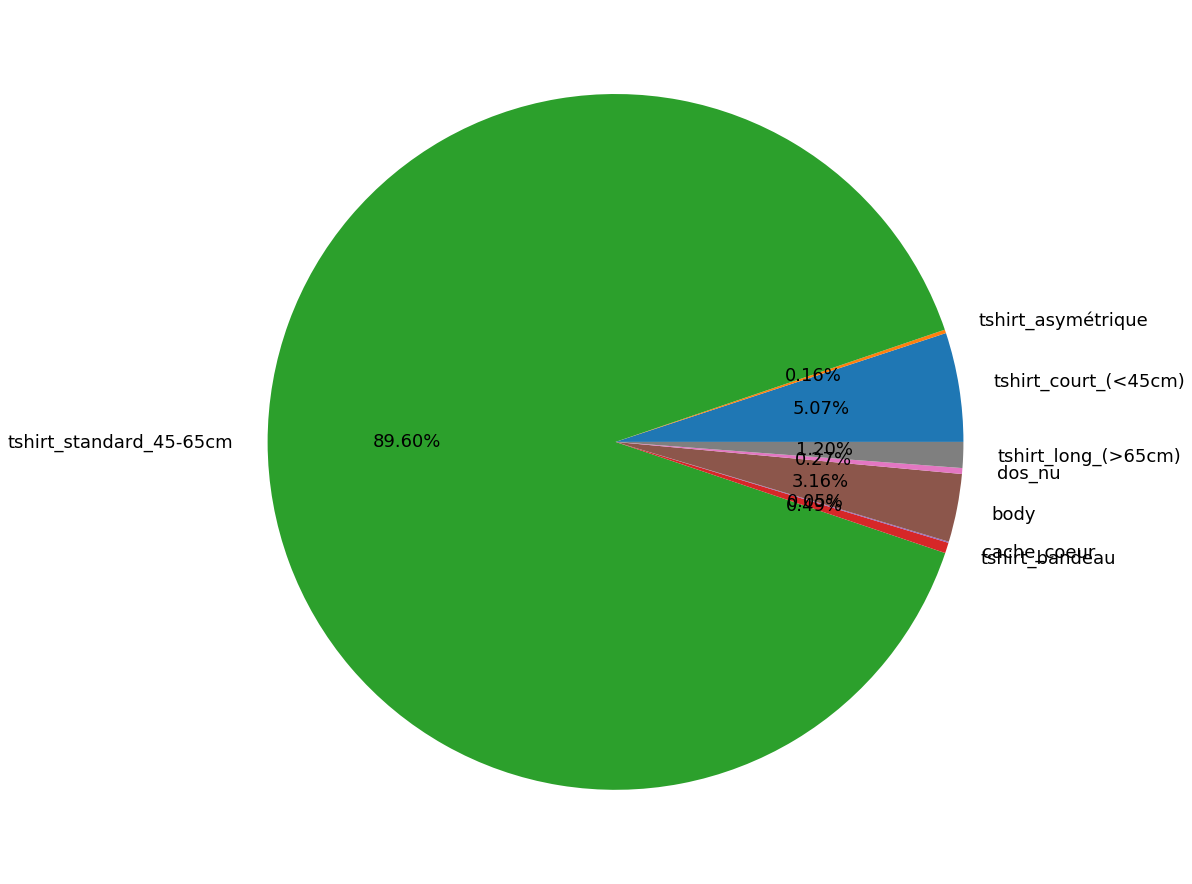

In [84]:
plt.figure(figsize=(16,16))
sorted_counts = all_raw_features['style_shape'].value_counts()

print(sorted_counts)
sorted_counts = sorted_counts.sample(frac = 1,random_state = 90)

patches,l_text,p_text = plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)

plt.savefig("../../saved_figs/Pie chart of style shape.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

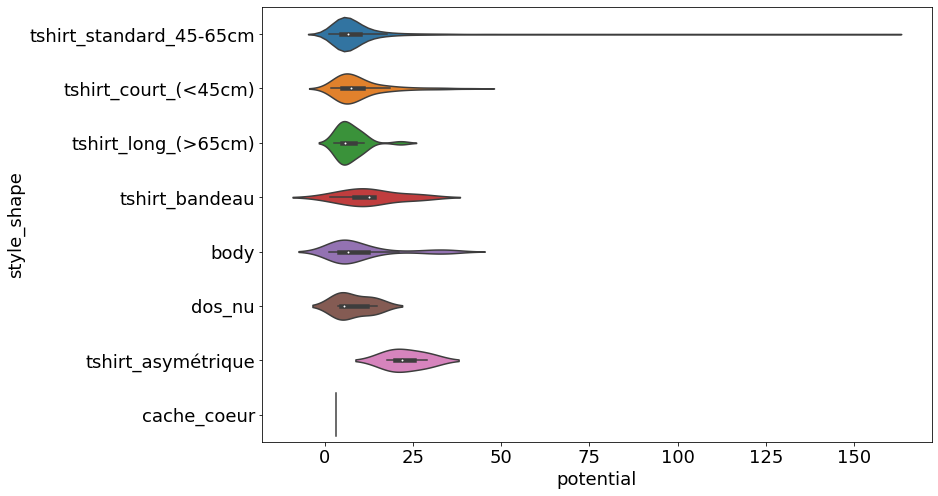

In [88]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('style shape',fontsize = 18)
plt.xlabel('potential',fontsize = 18)

sns.violinplot(y = all_raw_features['style_shape'],x = all_raw_features['potential'],orient = 'h')
plt.savefig('../../saved_figs/styleshape_violin.pdf', dpi = 1200,bbox_inches = 'tight')

## -Style_sleeve

manches_courtes    895
manches_longues    350
sans_manches       293
bretelles          236
manches_3/4         51
divers              11
Name: style_sleeve, dtype: int64


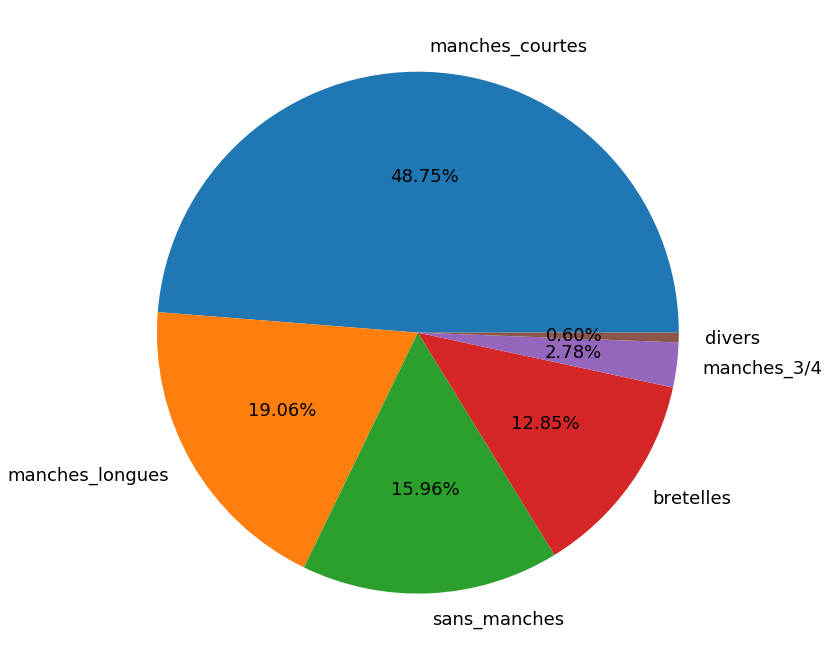

In [90]:
plt.figure(figsize=(12,12))
sorted_counts = all_raw_features['style_sleeve'].value_counts()
print(sorted_counts)
patches,l_text,p_text = plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)
plt.savefig("../../saved_figs/Pie chart of style sleeve.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

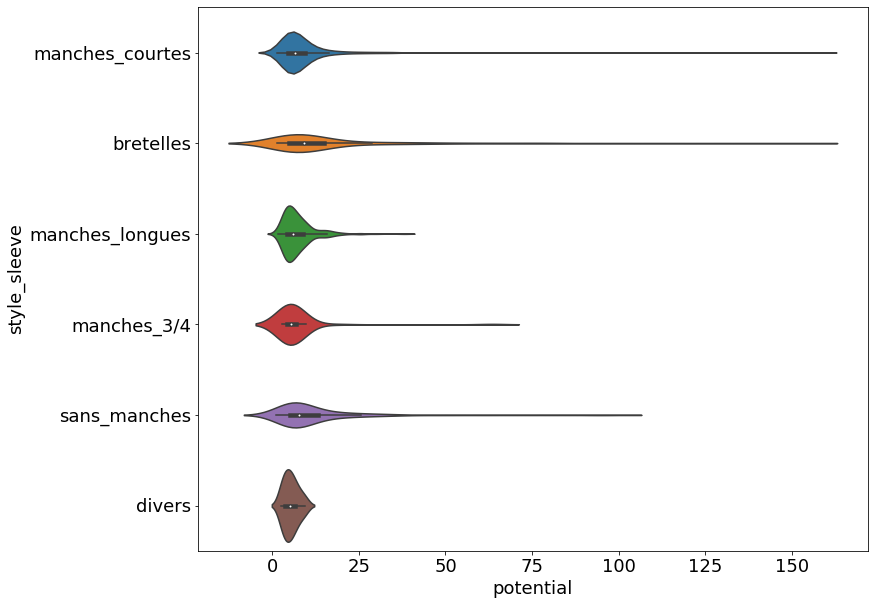

In [93]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('style sleeve',fontsize = 18)
plt.xlabel('potential',fontsize = 18)
sns.violinplot(y = all_raw_features['style_sleeve'],x = all_raw_features['potential'],orient = 'h')
plt.savefig('../../saved_figs/stylesleeve_violin.pdf', dpi = 1200,bbox_inches = 'tight')

## -style collar

col_rond        1142
col_v            396
divers            84
col_monta         80
col_carré         61
col_montant       18
sans_col          16
col_bateau        13
col_roulé         10
col_bénitier       5
col_polo           3
col_rapporté       3
col_fendu          3
col_bénit          2
Name: style_collar, dtype: int64


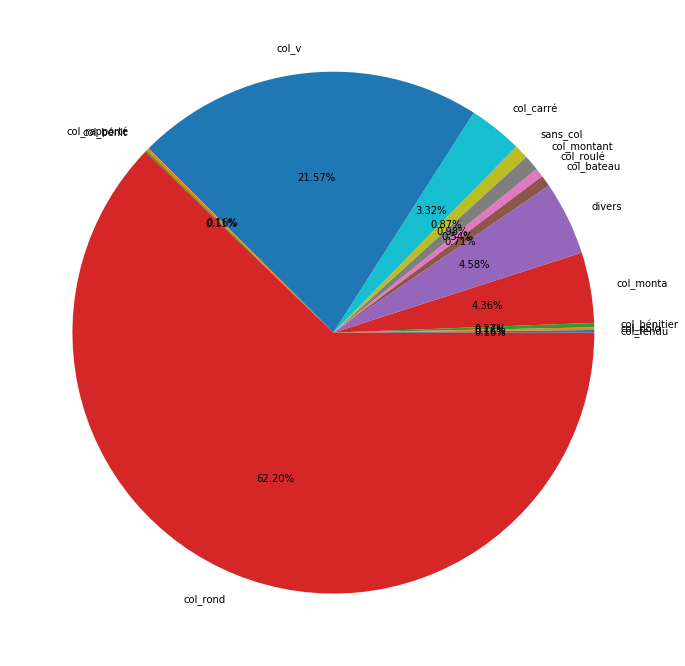

In [100]:
plt.figure(figsize=(12,12))
sorted_counts = all_raw_features['style_collar'].value_counts()
print(sorted_counts)

sorted_counts = sorted_counts.sample(frac = 1,random_state = 50)
plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
plt.savefig("../../saved_figs/Pie chart of stylecollar.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

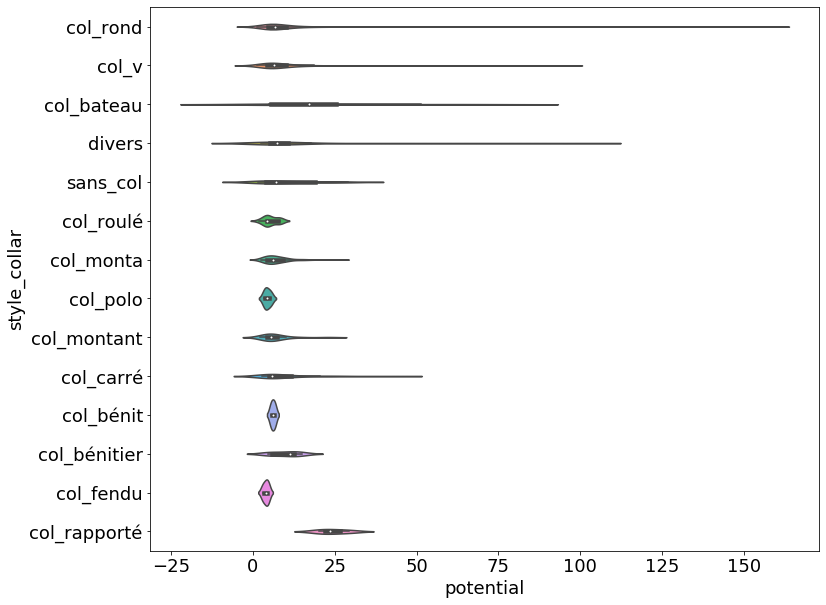

In [109]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('collar style',fontsize = 18)
plt.xlabel('potential',fontsize = 18)

sns.violinplot(y = all_raw_features['style_collar'],x = all_raw_features['potential'],orient = 'h')
plt.savefig('../../saved_figs/stylecollar_violin.pdf', dpi = 1200,bbox_inches = 'tight')

## -pattern types

NaN                     1430
solid color              265
text/numbers/letters      46
stripes                   37
graphics                  28
floral                    19
polka dots                 4
squares/diamonds           3
animal                     2
metallic                   2
Name: pattern type, dtype: int64


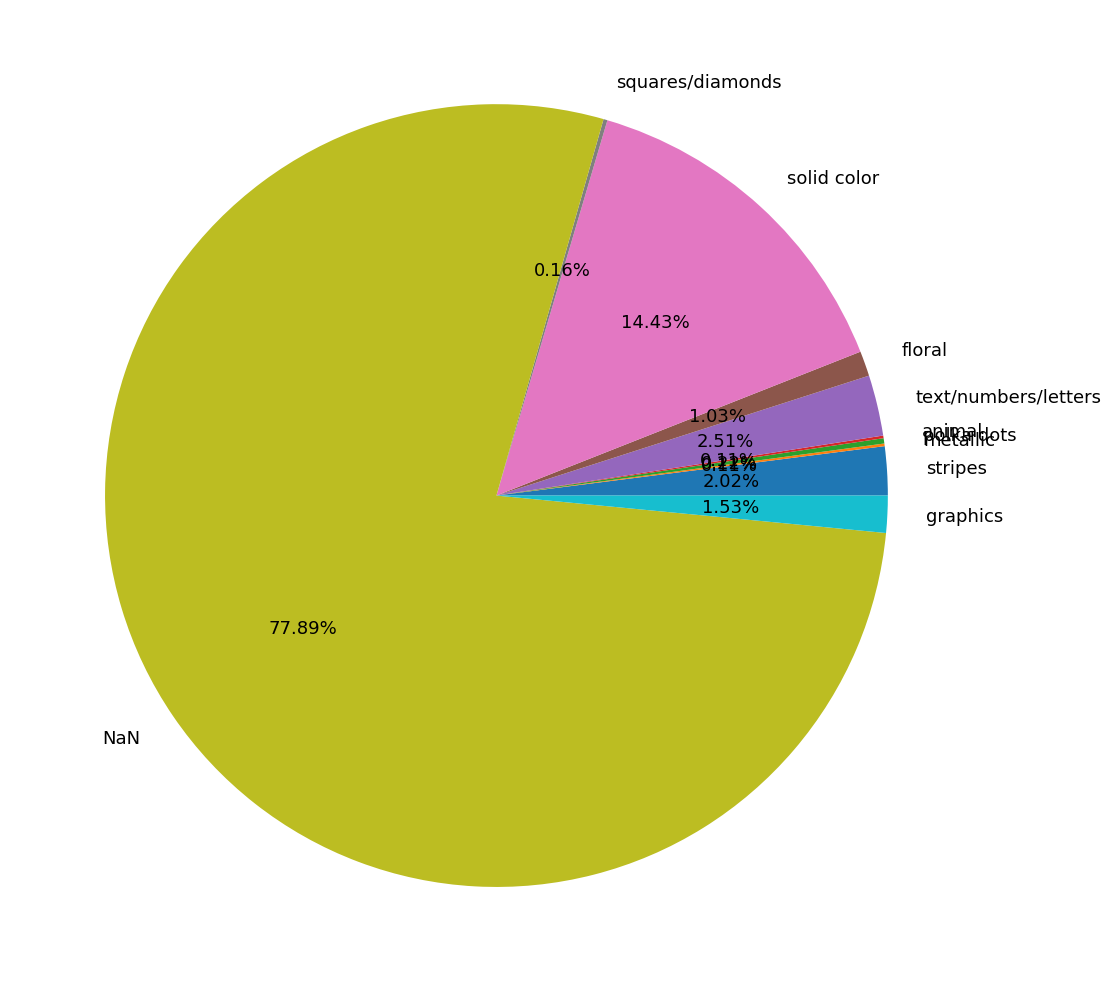

In [116]:
plt.figure(figsize=(18,18))
sorted_counts = all_raw_features['pattern type'].value_counts()
print(sorted_counts)
sorted_counts = sorted_counts.sample(frac = 1,random_state = 43)

patches,l_text,p_text=plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)

plt.savefig("../../saved_figs/Pie chart of pattern.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

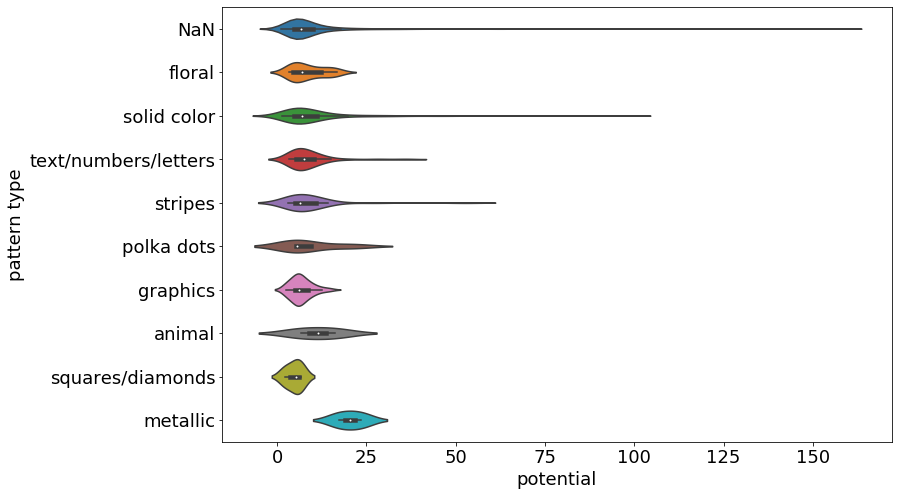

In [120]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('pattern type',fontsize = 18)
plt.xlabel('potential',fontsize = 18)

sns.violinplot(y = all_raw_features['pattern type'],x = all_raw_features['potential'],orient = 'h')
plt.savefig("../../saved_figs/violinplot of pattern.pdf",dpi=1200,bbox_inches = 'tight')

## -Composition

In [461]:
all_raw_features[all_raw_features['composition'] == np.nan]
##No missing data

,product_id,name,style,season,price,embellishments,pattern type,pattern type fallback,shoulders,tops silhouette,color,composition,potential,style_shape,style_sleeve,style_collar


### ---Coton

0      1044
100     332
95      215
50      107
60       34
Name: Coton, dtype: int64


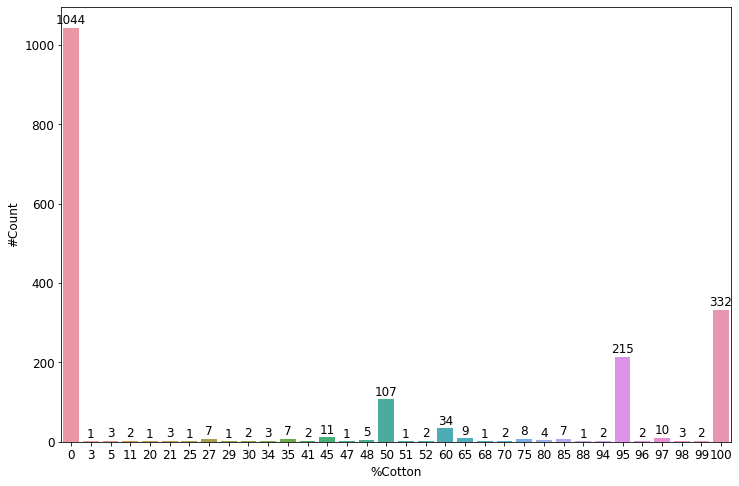

In [124]:
plt.figure(figsize=(12,8))
sorted_counts = data_table['Coton'].value_counts()
print(sorted_counts.head())
g = sns.barplot(x=sorted_counts.index,y=sorted_counts.values)
g.set_xlabel('%Cotton', fontsize=12)
g.set_ylabel('#Count', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

rank = sorted(list(sorted_counts.index))
rank_dict = {}
for i in range(len(rank)):
    rank_dict[rank[i]] = i
for i in range(len(sorted_counts)):
    g.text(rank_dict[sorted_counts.index[i]],sorted_counts.values[i]+10,
           sorted_counts.values[i],color="black",ha="center",fontsize = 12)
plt.savefig("../../saved_figs/bar chart of coton.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

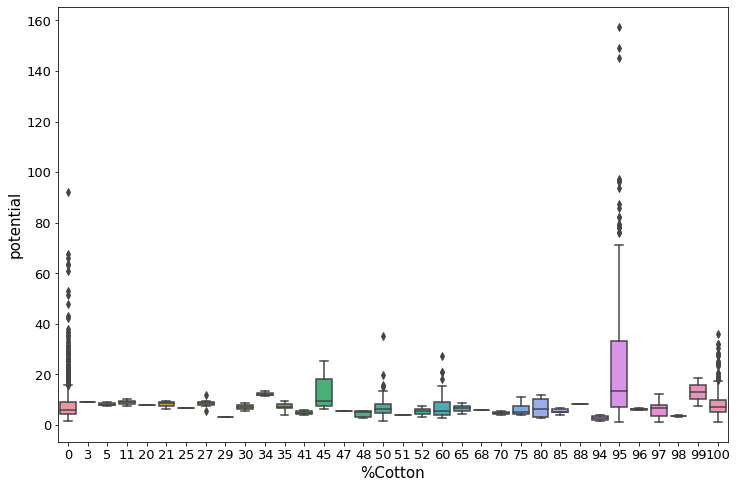

In [129]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)


sns.boxplot(x = data_table['Coton'],y = data_table['potential'])
plt.xlabel('%Cotton',fontsize = 15)
plt.ylabel('potential',fontsize = 15)
plt.savefig("../../saved_figs/boxplot of coton.pdf",dpi=1200,bbox_inches = 'tight')

### ---Polyester

0      1102
95      131
65       72
100      58
62       37
Name: Polyester, dtype: int64


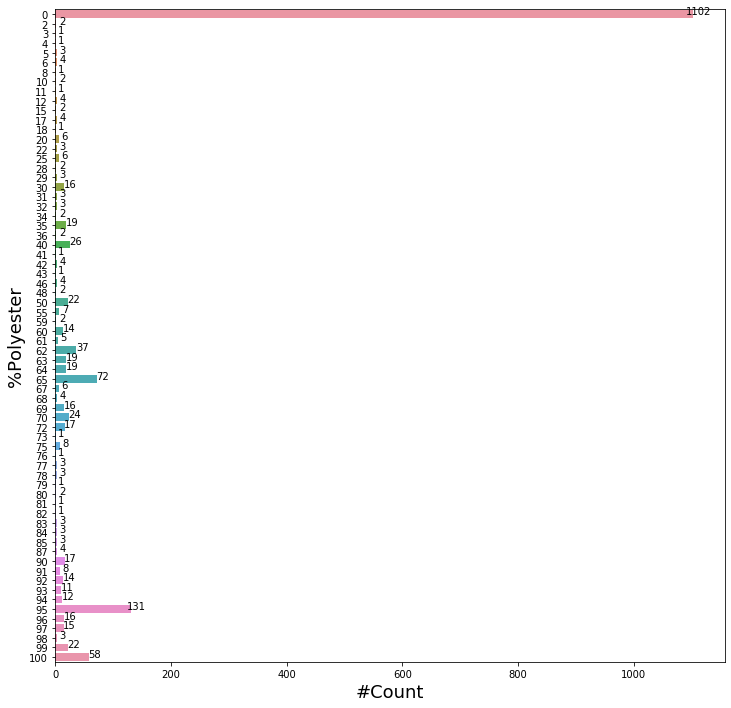

In [133]:
plt.figure(figsize=(12,12))
sorted_counts = data_table['Polyester'].value_counts()
print(sorted_counts.head())
g = sns.barplot(y=sorted_counts.index,x=sorted_counts.values,orient = 'h')
g.set_ylabel('%Polyester', fontsize=18)
g.set_xlabel('#Count', fontsize=18)
rank = sorted(list(sorted_counts.index))
rank_dict = {}
for i in range(len(rank)):
    rank_dict[rank[i]] = i
for i in range(len(sorted_counts)):
    g.text(sorted_counts.values[i]+10,rank_dict[sorted_counts.index[i]],sorted_counts.values[i],color="black",ha="center")
plt.savefig("../../saved_figs/bar chart of Polyester.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

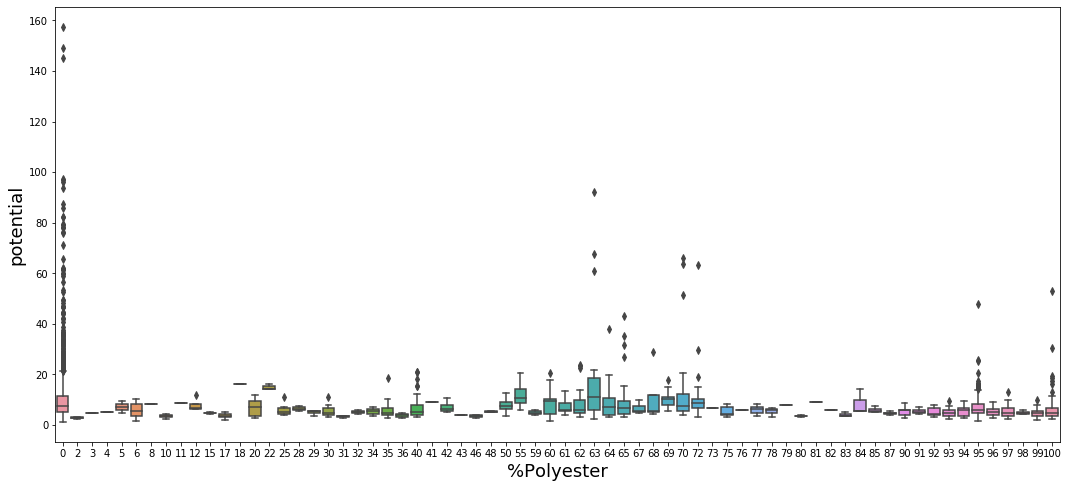

In [134]:
plt.figure(figsize=(18,8))
sns.boxplot(x = data_table['Polyester'],y = data_table['potential'])
plt.xlabel('%Polyester',fontsize = 18)
plt.ylabel('potential',fontsize = 18)
plt.savefig("../../saved_figs/Box plot of Polyester.pdf",dpi=1200,bbox_inches = 'tight')

### ---Viscose

0      1170
95      110
33       48
100      46
35       43
Name: Viscose, dtype: int64


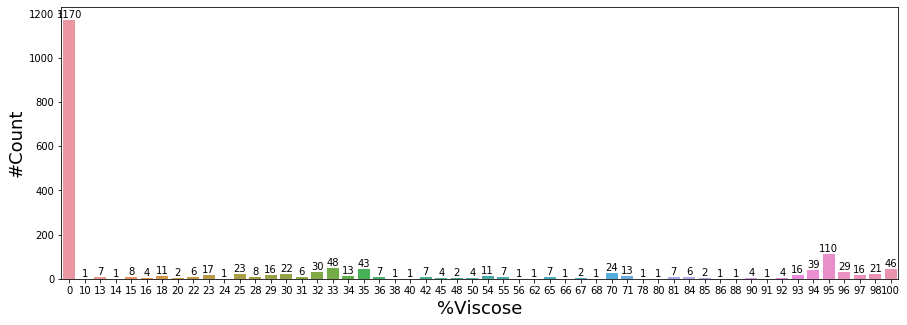

In [135]:
plt.figure(figsize=(15,5))
sorted_counts = data_table['Viscose'].value_counts()
print(sorted_counts.head())
g = sns.barplot(x=sorted_counts.index,y=sorted_counts.values)
g.set_xlabel('%Viscose', fontsize=18)
g.set_ylabel('#Count', fontsize=18)
rank = sorted(list(sorted_counts.index))
rank_dict = {}
for i in range(len(rank)):
    rank_dict[rank[i]] = i
for i in range(len(sorted_counts)):
    g.text(rank_dict[sorted_counts.index[i]],sorted_counts.values[i]+10,sorted_counts.values[i],color="black",ha="center")
plt.savefig("../../saved_figs/bar chart of Viscose.pdf",dpi=800,bbox_inches = 'tight')
plt.show()

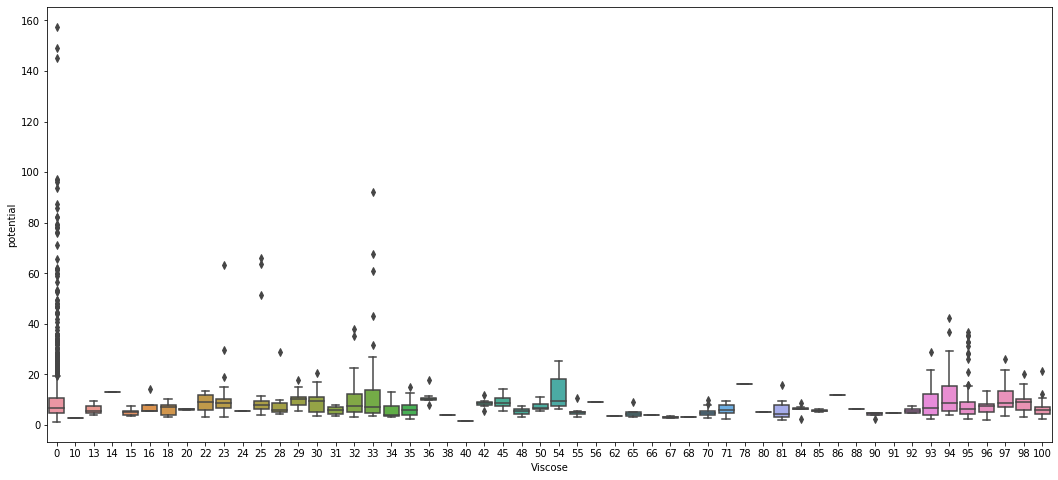

In [488]:
plt.figure(figsize=(18,8))
sns.boxplot(x = data_table['Viscose'],y = data_table['potential'])

### ---Elasthanne

0    793
5    535
4    118
2     90
6     74
Name: Elasthanne, dtype: int64


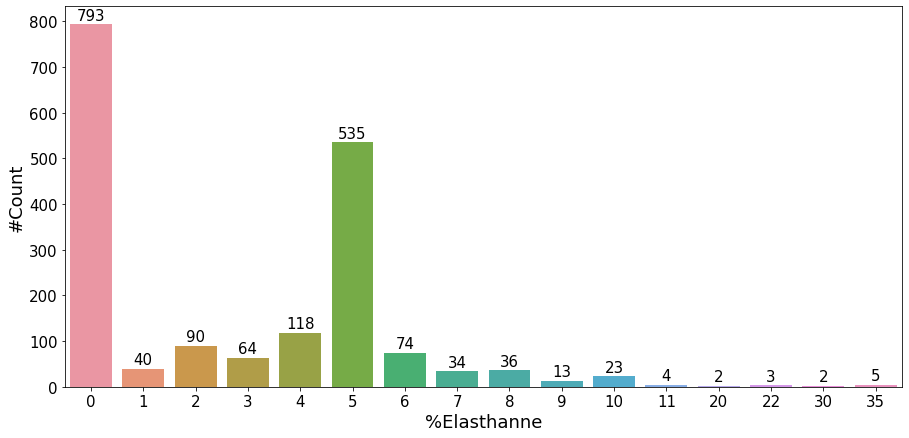

In [139]:
plt.figure(figsize=(15,7))
sorted_counts = data_table['Elasthanne'].value_counts()
print(sorted_counts.head())
g = sns.barplot(x=sorted_counts.index,y=sorted_counts.values)
g.set_xlabel('%Elasthanne', fontsize=18)
g.set_ylabel('#Count', fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
rank = sorted(list(sorted_counts.index))
rank_dict = {}
for i in range(len(rank)):
    rank_dict[rank[i]] = i
for i in range(len(sorted_counts)):
    g.text(rank_dict[sorted_counts.index[i]],sorted_counts.values[i]+10,
           sorted_counts.values[i],color="black",ha="center",fontsize=15)
plt.savefig("../../saved_figs/bar chart of Elasthanne.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

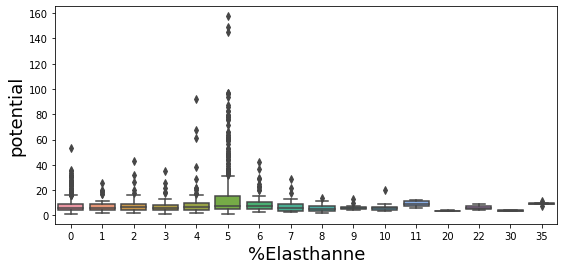

In [141]:
plt.figure(figsize=(9,4))
sns.boxplot(x = data_table['Elasthanne'],y = data_table['potential'])
plt.xlabel('%Elasthanne',fontsize = 18)
plt.ylabel('potential',fontsize = 18)
plt.savefig("../../saved_figs/box plot of Elasthanne.pdf",dpi=1200,bbox_inches = 'tight')

### ---Others

In [ ]:
plt.figure(figsize=(15,5))
sorted_counts = data_table[''].value_counts()
print(sorted_counts.head())
sns.barplot(x=sorted_counts.index,y=sorted_counts.values)
# plt.savefig("../../saved_figs/Pie chart of coton.pdf",dpi=800)
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
sns.violinplot(x = data_table[''],y = data_table['potential_025'])

## -pattern fallback

NaN                 1365
solid colors         271
positional print     127
full print            72
fabric/texture         1
Name: pattern type fallback, dtype: int64


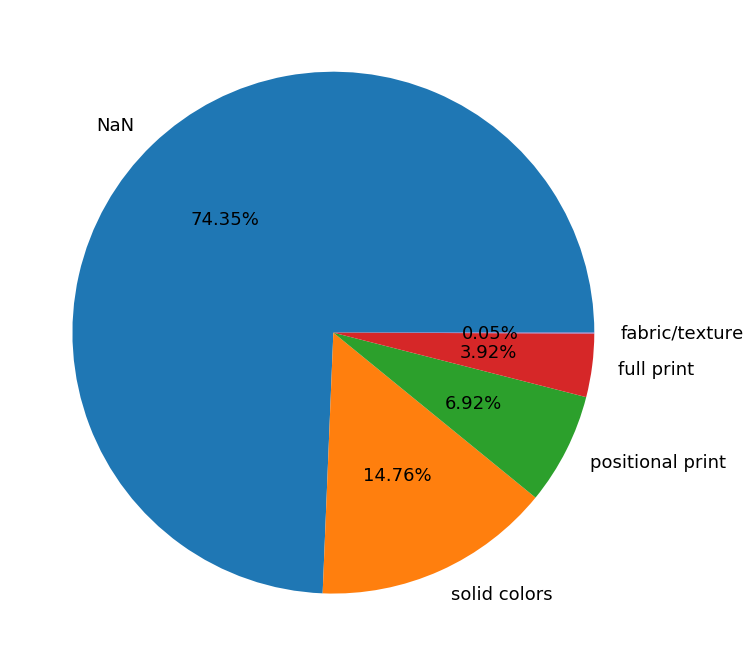

In [142]:
plt.figure(figsize=(12,12))
sorted_counts = all_raw_features['pattern type fallback'].value_counts()
print(sorted_counts)
patches,l_text,p_text = plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)

plt.savefig("../../saved_figs/Pie chart of pattern fallback.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

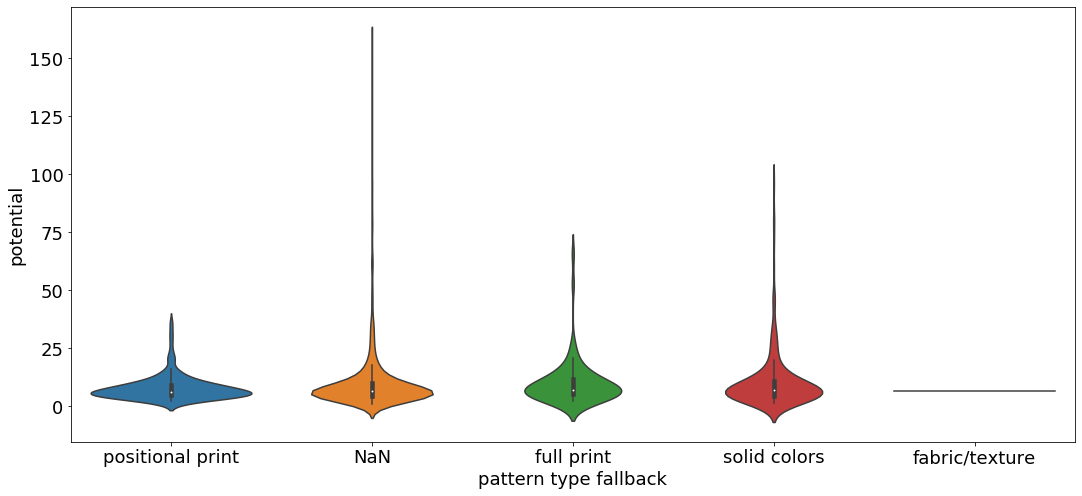

In [144]:
plt.figure(figsize=(18,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlabel('p',fontsize = 18)
plt.ylabel('potential',fontsize = 18)
sns.violinplot(x = all_raw_features['pattern type fallback'],y = all_raw_features['potential'])
plt.savefig("../../saved_figs/violinplot of pattern fallback.pdf",dpi=1200,bbox_inches = 'tight')

# -Shoulder Types

NaN                  1428
covered shoulders     293
spaghetti strap        67
wide strap             38
off shoulder            8
one shoulder            2
Name: shoulders, dtype: int64


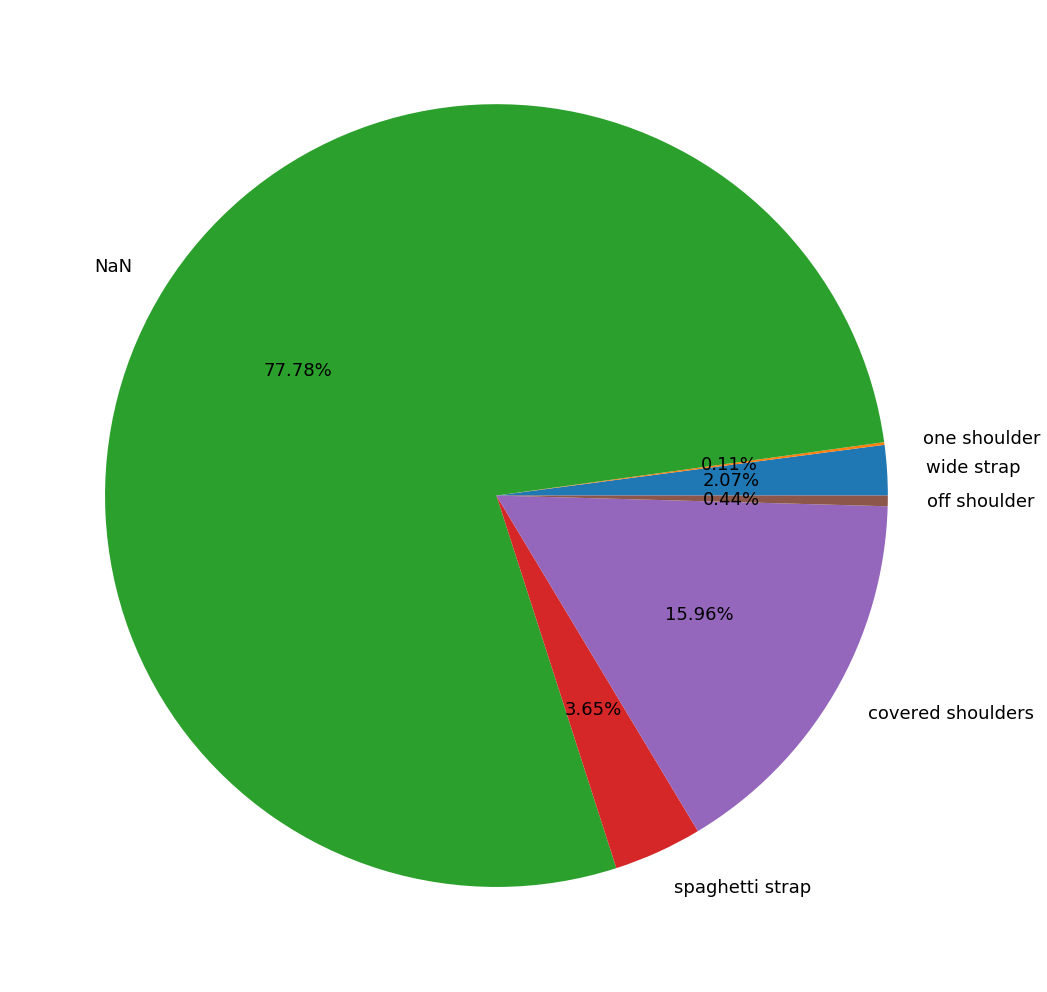

In [145]:
plt.figure(figsize=(18,18))
sorted_counts = all_raw_features['shoulders'].value_counts()
print(sorted_counts)
sorted_counts = sorted_counts.sample(frac = 1,random_state = 7)
patches,l_text,p_text=plt.pie(x=sorted_counts,labels=sorted_counts.index,autopct="%0.2f%%")
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)
plt.savefig("../../saved_figs/Pie chart of shoulder.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

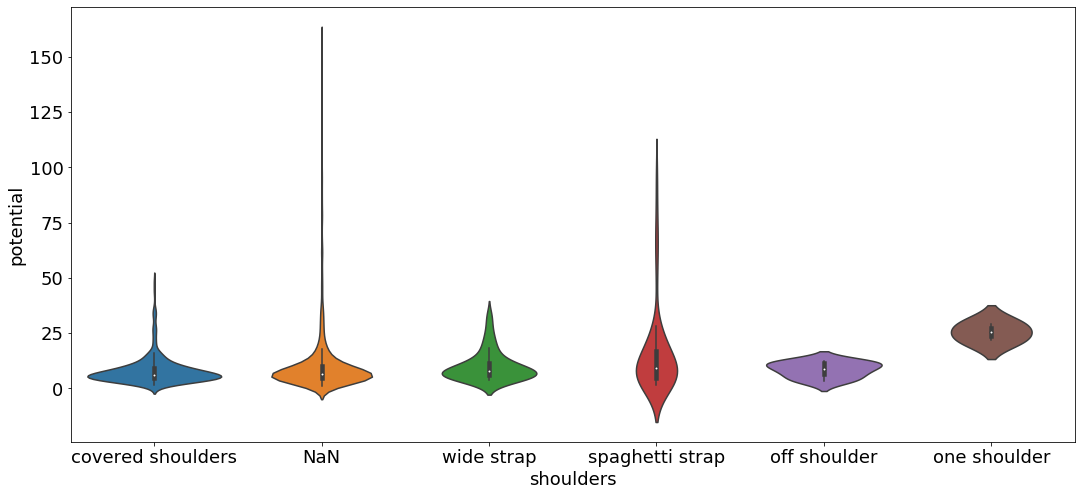

In [147]:
plt.figure(figsize=(18,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.xlabel('shoulder',fontsize = 18)
plt.ylabel('potential',fontsize = 18)
sns.violinplot(x = all_raw_features['shoulders'],y = all_raw_features['potential'])
plt.savefig("../../saved_figs/violin plot of shoulder.pdf",dpi=1200,bbox_inches = 'tight')

# Pearson corr

In [15]:
display(data_table.head())
data_table_new = data_table.replace(0,np.nan)
display(data_table_new)
data_table_new = data_table_new.dropna(axis=1,how='all') 
data_table_new = data_table_new.fillna(0)
display(data_table_new.shape)

,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential
0,2134,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.526208
1,2135,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.999364
2,2136,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.946084
3,2137,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.605577
4,2138,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.923380


,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential
0,2134,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.526208
1,2135,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.999364
2,2136,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.946084
3,2137,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.605577
4,2138,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.923380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,14483,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,65.0,3.307089
1832,14617,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.477166
1833,14632,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,5.520378
1834,14692,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,65.0,NaN,NaN,35.0,NaN,NaN,18.408069


(1836, 98)

In [16]:
all_dummy_features = data_table_new.iloc[:,1:-1]
all_dummy_features.corr()

,season_summer,season_winter,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,embellishments_simple,embellishments_tie closure,...,Coton,Elasthanne,Fibre metallisée,Lin,Lyocell,Modal,Polyamide,Polyamide enduit,Polyester,Viscose
season_summer,1.000000,-1.000000,0.026910,0.068260,0.033077,-0.023344,-0.013485,-0.064640,0.001768,0.013485,...,0.044809,-0.061471,-0.076407,-0.041352,-0.023344,-0.039657,-0.020675,-0.057284,-0.080156,0.122859
season_winter,-1.000000,1.000000,-0.026910,-0.068260,-0.033077,0.023344,0.013485,0.064640,-0.001768,-0.013485,...,-0.044809,0.061471,0.076407,0.041352,0.023344,0.039657,0.020675,0.057284,0.080156,-0.122859
embellishments_buttons,0.026910,-0.026910,1.000000,-0.020359,-0.006765,-0.002387,-0.004137,-0.014046,-0.035250,-0.004137,...,-0.002278,-0.033484,-0.011468,-0.012556,-0.002387,0.003900,-0.025838,-0.005858,0.023502,-0.007308
embellishments_fabric embellishment,0.068260,-0.068260,-0.020359,1.000000,-0.013171,-0.004648,-0.008054,-0.027347,-0.068630,-0.008054,...,0.156918,-0.157264,-0.022328,-0.024446,-0.004648,0.082486,-0.050305,-0.011405,-0.092550,-0.087568
embellishments_fringe,0.033077,-0.033077,-0.006765,-0.013171,1.000000,-0.001544,-0.002676,-0.009087,-0.022804,-0.002676,...,-0.017130,-0.007015,-0.007419,-0.008123,-0.001544,-0.018721,-0.016715,-0.003790,-0.012804,0.052159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Modal,-0.039657,0.039657,0.003900,0.082486,-0.018721,-0.006606,0.052546,0.026861,-0.022169,-0.011448,...,-0.015353,-0.165629,-0.031737,-0.034748,-0.006606,1.000000,-0.071502,-0.016211,-0.139318,-0.181413
Polyamide,-0.020675,0.020675,-0.025838,-0.050305,-0.016715,0.132127,-0.010222,0.011156,-0.009231,-0.010222,...,-0.172738,0.184552,0.116077,-0.031025,-0.005898,-0.071502,1.000000,-0.014474,-0.102572,-0.062894
Polyamide enduit,-0.057284,0.057284,-0.005858,-0.011405,-0.003790,-0.001337,-0.002317,0.049997,0.012808,-0.002317,...,-0.046797,0.078867,0.116634,-0.007034,-0.001337,-0.016211,-0.014474,1.000000,-0.042359,-0.036629
Polyester,-0.080156,0.080156,0.023502,-0.092550,-0.012804,0.043147,0.012537,-0.063509,-0.008770,0.025474,...,-0.559229,0.146079,0.020210,-0.089891,-0.017380,-0.139318,-0.102572,-0.042359,1.000000,-0.219085


## --Pearson

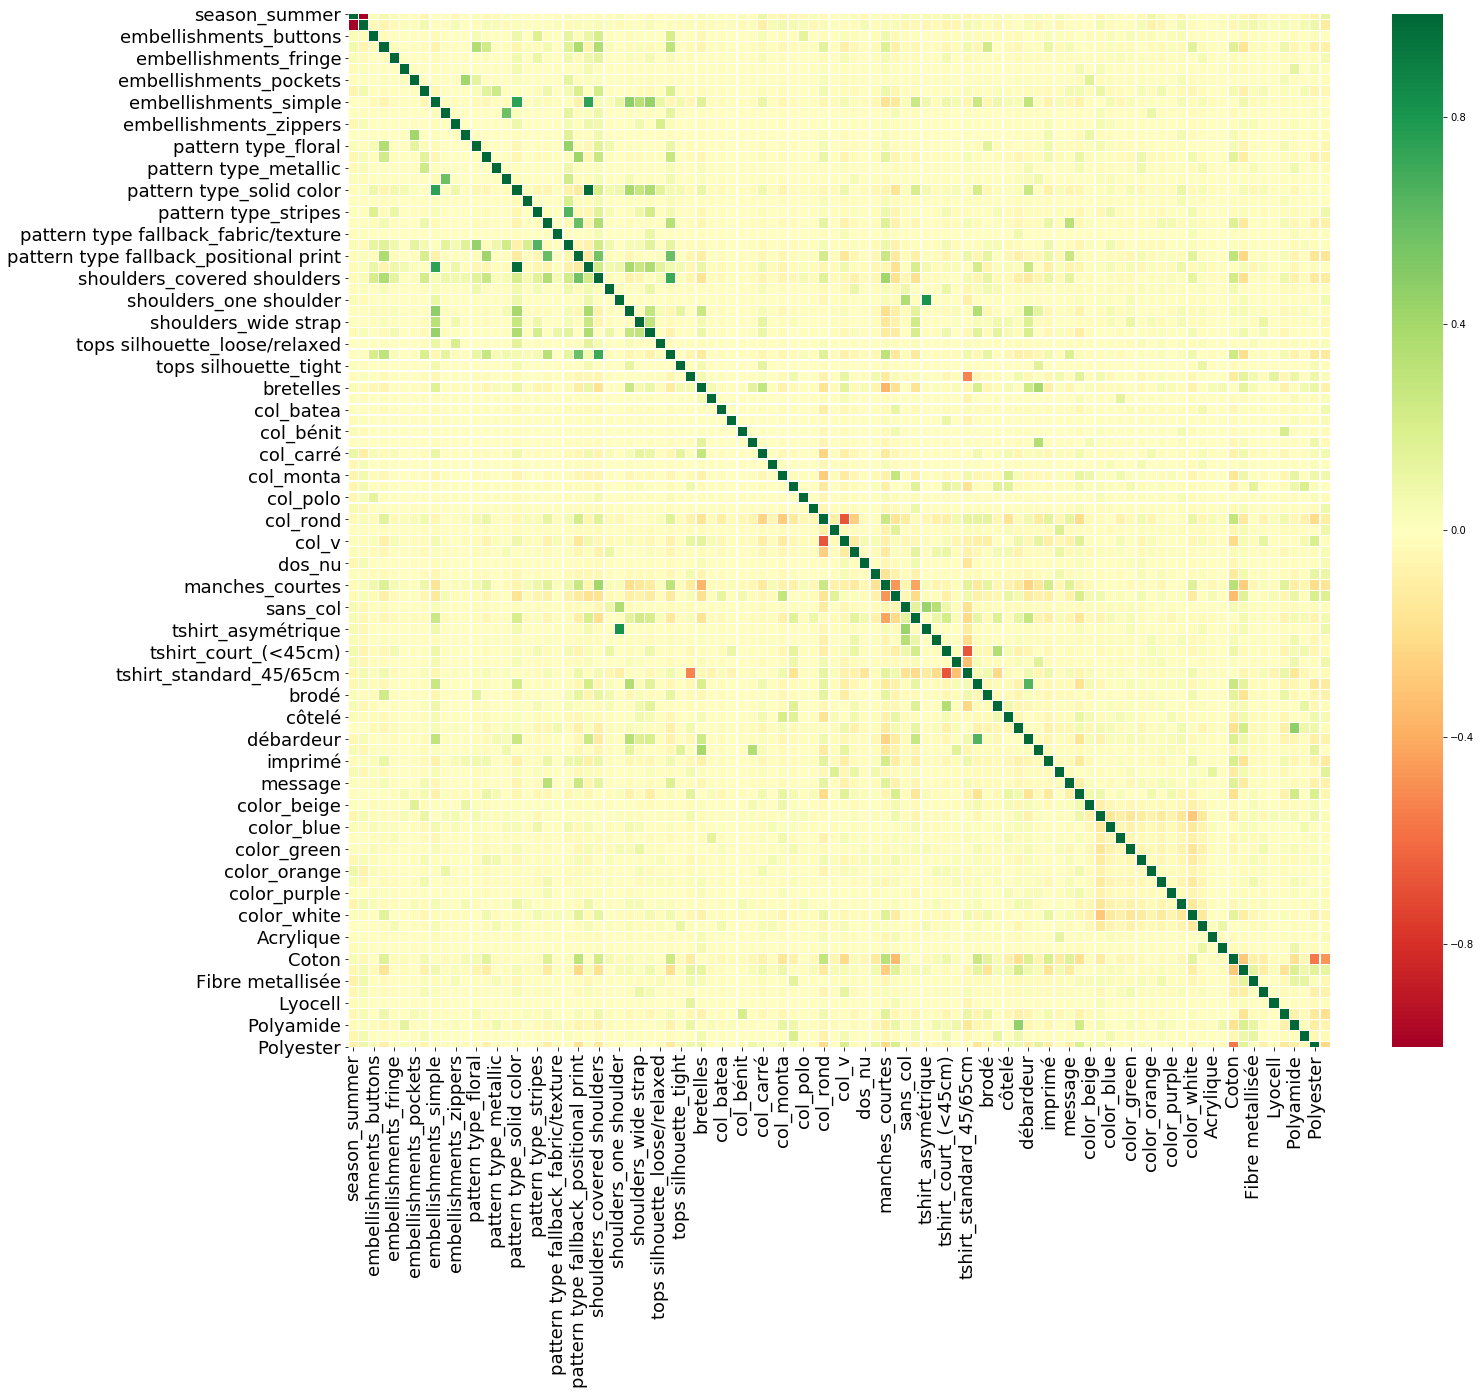

In [149]:
plt.figure(figsize=(22,19))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
sns.heatmap(all_dummy_features.corr(method = 'pearson'),annot=False,cmap='RdYlGn',linewidths=0.2) 
plt.savefig('../../saved_figs/heat map.pdf', dpi = 1200,bbox_inches = 'tight')
plt.show()

## --Kendall

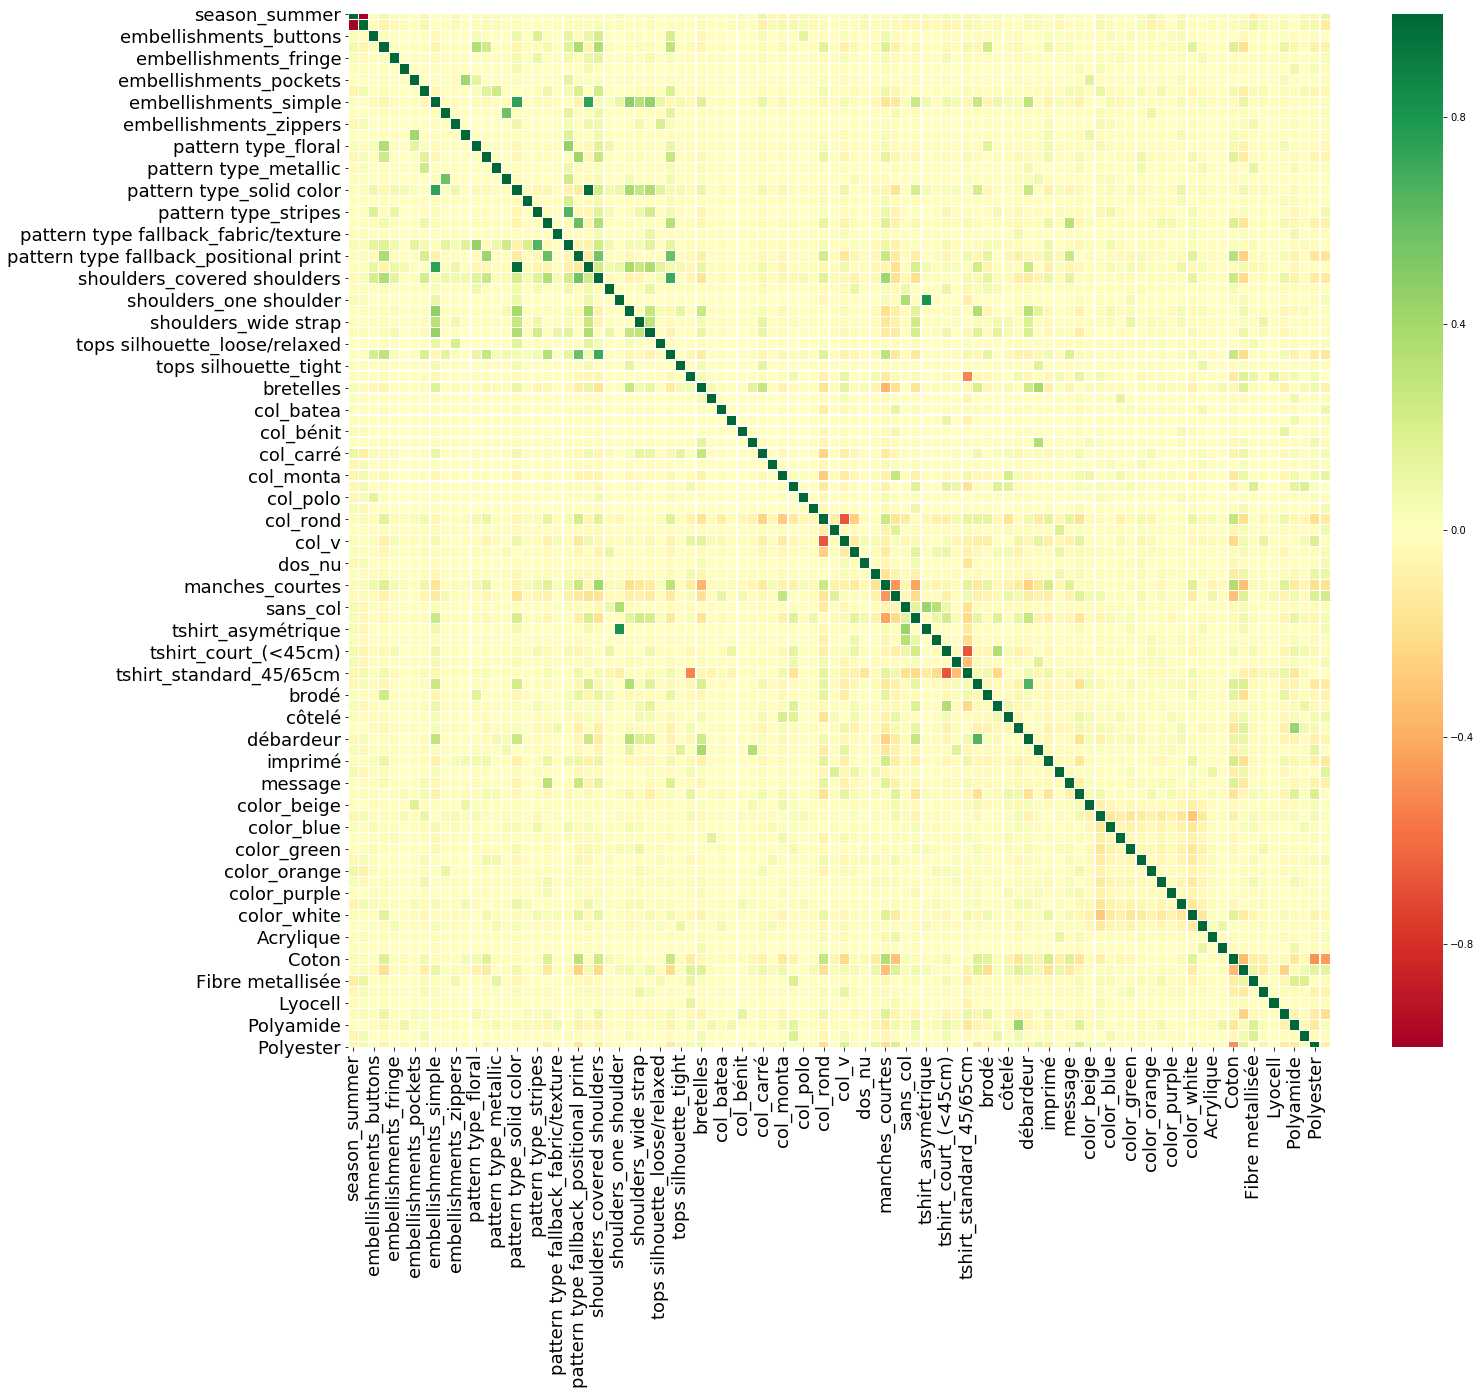

In [150]:
plt.figure(figsize=(22,19))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
sns.heatmap(all_dummy_features.corr(method = 'kendall'),annot=False,cmap='RdYlGn',linewidths=0.2) 
plt.savefig('../../saved_figs/kendall heat map.pdf', dpi = 1200,bbox_inches = 'tight')
plt.show()

# Pair Plot

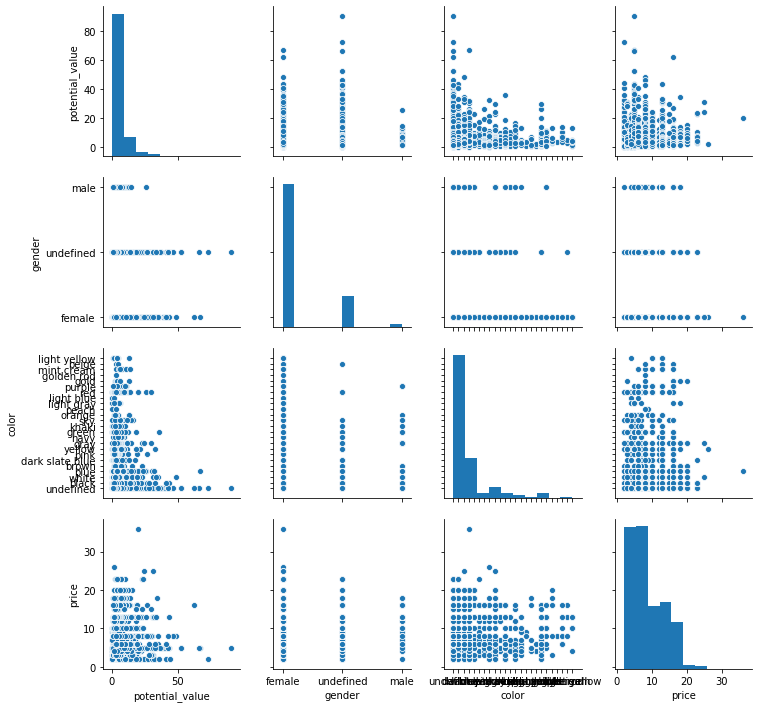

In [51]:
#pairplot

g = sns.pairplot(data,vars=['potential_value','gender','color','price'])
g.savefig('../saved_figs/pair_plot.png',dpi = 300)